In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
E1, E7, J = 50, 100, 5
R1, R2, R3, R4, R5, R6 = 10, 15, 20, 25, 30, 35

Rk1 = R1 + R4 + R5 + R6
Rk2 = R2 + R5 
Rk3 = R2 + R3 + R4
Rk12 = R5
Rk13 = R4
Rk23 = R2
print(f'Rk1, Rk2, Rk3 = {Rk1}, {Rk2}, {Rk3} Ом\nRk12, Rk13, Rk23 = {Rk12}, {Rk13}, {Rk23} Ом')

Rk1, Rk2, Rk3 = 100, 45, 60 Ом
Rk12, Rk13, Rk23 = 30, 25, 15 Ом


### за 2 З. К. находим контурные токи
_Ik1 * Rk1 - Ik2 * Rk12 - Ik3 * Rk13 = E1 + J * R1_

_-Ik1 * Rk12 + Ik2 * Rk2 - Ik3 * Rk23 = -E7 + J * 0_

_-Ik1 * Rk13 - Ik2 * Rk23 + Ik3 * Rk3 = J * 0_


In [87]:
A = np.array([
    [Rk1, -Rk12, -Rk13],
    [-Rk12, Rk2, -Rk23],
    [-Rk13, -Rk23, Rk3],
])
y = np.array([
    [E1 + J * R1],
    [-E7 + J * 0],
    [J * 0]
])
x = np.linalg.solve(A, y)
Ik1, Ik2, Ik3 = x[0][0], x[1][0], x[2][0]
print(f'A = \n{A}', f'y = \n{y}', f'x = \n{x}', sep='\n\n')

A = 
[[100 -30 -25]
 [-30  45 -15]
 [-25 -15  60]]

y = 
[[ 100]
 [-100]
 [   0]]

x = 
[[ 0.20997375]
 [-2.23972003]
 [-0.47244094]]


In [88]:
I1 = J - Ik1 
I2 = Ik3 - Ik2
I3 = Ik3
I4 = Ik1 - Ik3
I5 = Ik1 - Ik2
I6 = Ik1   
print(f'I(1-6) = {round(I1, 3)}, {round(I2, 3)}, {round(I3, 3)}, {round(I4, 3)}, {round(I5, 3)}, {round(I6, 3)}')

I(1-6) = 4.79, 1.767, -0.472, 0.682, 2.45, 0.21


In [89]:
P = sum([r * pow(i, 2) for r, i in zip([R1, R2, R3, R4, R5, R6], [I1, I2, I3, I4, I5, I6])])
Pn = J * (I1 * R1 + E1) - I1 * E1 - E7 * Ik2
Pn, P

(473.97200349956256, 473.97200349956245)

In [90]:
f1 = 0
f3 = f1 + E7

G21 = 1 / R2
G22 = 1 / R5 + 1 / R2 + 1 / R4
G23 = 1 / R5
G24 = 1 / R4
G25 = 0

G41 = 1 / R3
G42 = G24
G43 = 0
G44 = 1 / R1 + 1 / R4 + 1 / R3
G45 = 1 / R1

G51 = 0
G52 = G25
G53 = 1 / R6
G54 = G45
G55 = 1 / R1 + 1 / R6

Jk2 = 0 + (f1 * G21 + f3 * G23)
Jk4 = -J - E1 / R1 + (f1 * G41 + f3 * G43)
Jk5 = J + E1 / R1 + (f1 * G51 + f3 * G53)

print(f'G2n = {round(G21, 3)}, {round(G22, 3)}, {round(G23, 3)}, {round(G24, 3)}, {round(G25, 3)}')
print(f'G4n = {round(G41, 3)}, {round(G42, 3)}, {round(G43, 3)}, {round(G44, 3)}, {round(G45, 3)}')
print(f'G5n = {round(G51, 3)}, {round(G52, 3)}, {round(G53, 3)}, {round(G54, 3)}, {round(G55, 3)}')
print(f'Jk(2, 4, 5) = {round(Jk2, 3)}, {round(Jk4, 3)}, {round(Jk5, 3)}')

G2n = 0.067, 0.14, 0.033, 0.04, 0
G4n = 0.05, 0.04, 0, 0.19, 0.1
G5n = 0, 0, 0.029, 0.1, 0.129
Jk(2, 4, 5) = 3.333, -10.0, 12.857


In [91]:
A = np.array([
    [G22, -G24, -G25],
    [-G42, G44, -G45],
    [-G52, -G54, G55],
])
y = np.array([
    [Jk2],
    [Jk4],
    [Jk5],
])
x = np.linalg.solve(A, y)
f2, f4, f5 = x[0][0], x[1][0], x[2][0]
print(f'A = \n{A}', f'y = \n{y}', f'x = \n{x}', sep='\n\n')

A = 
[[ 0.14       -0.04        0.        ]
 [-0.04        0.19       -0.1       ]
 [ 0.         -0.1         0.12857143]]

y = 
[[  3.33333333]
 [-10.        ]
 [ 12.85714286]]

x = 
[[ 26.50918635]
 [  9.4488189 ]
 [107.34908136]]


In [92]:
I1 = (f5 - f4 - E1) / R1
I2 = (f2 - f1) / R2
I3 = (f1 - f4) / R3 
I4 = (f2 - f4) / R4
I5 = (f3 - f2) / R5
I6 = (f5 - f3) / R6
print(f'I(1-6) = {round(I1, 3)}, {round(I2, 3)}, {round(I3, 3)}, {round(I4, 3)}, {round(I5, 3)}, {round(I6, 3)}')

I(1-6) = 4.79, 1.767, -0.472, 0.682, 2.45, 0.21


In [93]:
f6 = f5 - E1
V = f6 - f2
round(f6, 3), round(V, 3)

(57.349, 30.84)

In [94]:
print(f'f(1-6) = {round(f1, 3)}, {round(f2, 3)}, {round(f3, 3)}, {round(f4, 3)}, {round(f5, 3)}, {round(f6, 3)}')
f1 = 0
f3 = f1 + E7
f5 = f3 + R6 * I6
f6 = f5 - E1
f4 = f6 - R1 * I1
f1 = f4 + R3 * I3
f2 = f1 + R2 * I2
print(f'f(1-6) = {round(f1, 3)}, {round(f2, 3)}, {round(f3, 3)}, {round(f4, 3)}, {round(f5, 3)}, {round(f6, 3)}')

f(1-6) = 0, 26.509, 100, 9.449, 107.349, 57.349
f(1-6) = -0.0, 26.509, 100, 9.449, 107.349, 57.349


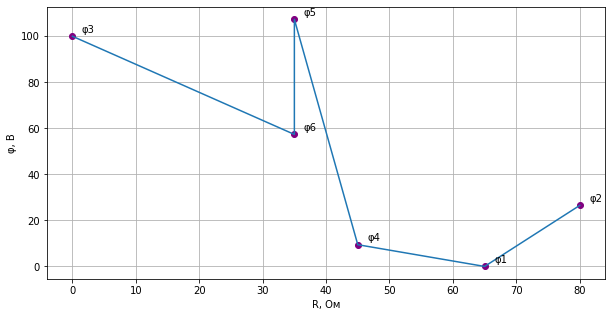

In [95]:
y, x = [f3, f6, f5, f4, f1, f2], [0, R6, R6, R6 + R1, R6 + R1 + R3, R6 + R1 + R3 + R2]
plt.figure(figsize=[10, 5])
plt.plot(x, y, 'bo', color='purple')
ax = plt.gca()
c = 0
annotate = [3, 6, 5, 4, 1, 2]
for x0, y0 in zip(x, y):
    ax.annotate(f'φ{annotate[c]}', (x0 + 1.5, y0 + 1.5))
    c += 1
plt.plot(x, y)
plt.xlabel('R, Ом')
plt.ylabel('φ, В')
plt.grid(True)
plt.show()

In [103]:
R254 = R2 * R5 / (R2 + R5) + R4
Re1 = R254 * R3 / (R254 + R3) + R6 + R1
I1e1 = E1 / Re1
I6e1 = I1e1
I3e1 = I6e1 * R254 / (R254 + R3)
I4e1 = I6e1 * R3 / (R254 + R3)
I5e1 = I4e1 * R2 / (R5 + R2)
I2e1 = I4e1 * R5 / (R5 + R2)
print(f'I(n)e1 = {round(I1e1, 3)}, {round(I2e1, 3)}, {round(I3e1, 3)}, {round(I4e1, 3)}, {round(I5e1, 3)}, {round(I6e1, 3)}')

I(n)e1 = 0.866, 0.21, 0.551, 0.315, 0.105, 0.866


In [104]:
Rk1 = R1 + R4 + R5 + R6
Rk12 = R5
Rk13 = R4
Rk2 = R5 + R2
R23 = R2
Rk3 = R2 +R3 + R4
print(f'Rk1 = {round(Rk1, 3)}, Rk12 = {round(Rk12, 3)}, Rk13 = {round(Rk13, 3)}, Rk2 = {round(Rk2, 3)}, R23 = {round(R23, 3)}, Rk3 = {round(Rk3, 3)}')

A = np.array([
    [Rk1, -Rk12, -Rk13],
    [-Rk12, Rk2, -Rk23],
    [-Rk13, -Rk23, Rk3],
])

y = np.array([
    [0],
    [-E7],
    [0]
])
x = np.linalg.solve(A, y)
Ik1, Ik2, Ik3 = x[0][0], x[1][0], x[2][0]
print(f'A = \n{A}', f'y = \n{y}', f'x = \n{x}', sep='\n\n')

Rk1 = 100, Rk12 = 30, Rk13 = 25, Rk2 = 45, R23 = 15, Rk3 = 60
A = 
[[100 -30 -25]
 [-30  45 -15]
 [-25 -15  60]]

y = 
[[   0]
 [-100]
 [   0]]

x = 
[[-1.52230971]
 [-3.76202975]
 [-1.57480315]]


In [107]:
I1E2 = -Ik1
I2E2 = Ik3 - Ik2
I3E2 = -Ik3
I4E2 = Ik1 - Ik3
I5E2 = Ik1 - Ik2
I6E2 = -Ik1
print(f'I1E2 = {round(I1E2, 3)}, I2E2 = {round(I2E2, 3)}, I3E2 = {round(I3E2, 3)}, I4E2 = {round(I4E2, 3)}, I5E2 = {round(I5E2, 3)}, I6E2 = {round(I6E2, 3)}')

I1E2 = -0.21, I2E2 = 1.767, I3E2 = 0.472, I4E2 = 0.682, I5E2 = 2.45, I6E2 = -0.21


In [108]:
A = np.array([
    [Rk1, -Rk12, -Rk13],
    [-Rk12, Rk2, -Rk23],
    [-Rk13, -Rk23, Rk3],
])

y = np.array([
    [J * R1],
    [0],
    [0]
])
x = np.linalg.solve(A, y)
Ik1, Ik2, Ik3 = x[0][0], x[1][0], x[2][0]
print(f'A = \n{A}', f'y = \n{y}', f'x = \n{x}', sep='\n\n')

A = 
[[100 -30 -25]
 [-30  45 -15]
 [-25 -15  60]]

y = 
[[50]
 [ 0]
 [ 0]]

x = 
[[0.86614173]
 [0.76115486]
 [0.5511811 ]]


In [110]:
I1J = J - Ik1
I2J = Ik2 - Ik3
I3J = Ik3
I4J = Ik1 - Ik3
I5J = Ik1 - Ik2
I6J = Ik1
print(f'I1J = {round(I1J, 3)}, I2J = {round(I2J, 3)}, I3J = {round(I3J, 3)}, I4J = {round(I4J, 3)}, I5J = {round(I5J, 3)}, I6J = {round(I6J, 3)}')

I1J = 4.134, I2J = 0.21, I3J = 0.551, I4J = 0.315, I5J = 0.105, I6J = 0.866


In [113]:
I1 = -I1e1 + I1E2 + I1J
I2 = -I2e1 + I2E2 - I2J
I3 = I3e1 - I3E2 + I3J
I4 = I4e1 + I4E2 + I4J
I5 = I5e1 + I5E2 + I5J
I6 = I6e1 - I6E2 + I6J
print(f'I(1-6) = {round(I1, 3)}, {round(I2, 3)}, {round(I3, 3)}, {round(I4, 3)}, {round(I5, 3)}, {round(I6, 3)}')

I(1-6) = 3.058, 1.347, 0.63, 1.312, 2.66, 1.942


In [116]:
Rk1 = R5 + R2
Rk12 = R2
Rk2 = R4 + R3
# Rk1 - Rk12 = -E2 + J * R5
# -Rk12 + Rk2 = 0 + J * R4
A = np.array([
    [Rk1, -Rk12],
    [-Rk12, Rk2]
])
y = np.array([
    [-E7 + J * R5],
    [0 + J * R4],
])

x = np.linalg.solve(A, y)
Ik1, Ik2 = x[0][0], x[1][0]
print(f'A = \n{A}', f'y = \n{y}', f'x = \n{x}', sep='\n\n')

A = 
[[ 45 -15]
 [-15  45]]

y = 
[[ 50]
 [125]]

x = 
[[2.29166667]
 [3.54166667]]


In [119]:
UX1 = (J - Ik1) * R5 + (J - Ik2) * R4 + J * R6
round(UX1, 3)

292.708

In [122]:
R254 = (R2 * R5) / (R2 + R5) + R4
R2543 = (R254 * R3) / (R254 + R3)
Re = R2543 + R6
round(R254, 3), round(R2543, 3), round(Re, 3)
I = (E1 + UX1) / (Re + R1)
round(I, 3)

5.937